<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SCALE" data-toc-modified-id="SCALE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SCALE</a></span></li><li><span><a href="#CREATE-DATA-STRUCTURE" data-toc-modified-id="CREATE-DATA-STRUCTURE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CREATE DATA STRUCTURE</a></span></li><li><span><a href="#BUILD-RNN" data-toc-modified-id="BUILD-RNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>BUILD RNN</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
training_data = pd.read_csv('../../data/raw/RNN/Google_Stock_Price_Train.csv')

In [10]:
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [11]:
trainingSet = training_data.iloc[:,1:2]

In [14]:
trainingSet.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [26]:
trainingSetArray = trainingSet.values

In [27]:
trainingSetArray[0:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [28]:
type(trainingSetArray)

numpy.ndarray

### SCALE

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler(feature_range=(0,1)) # feature_range=(0,1) is optional/default

In [31]:
scaledTrainingSetArray = scaler.fit_transform(trainingSetArray)

In [32]:
scaledTrainingSetArray[0:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [33]:
type(scaledTrainingSetArray)

numpy.ndarray

In [34]:
len(scaledTrainingSetArray)

1258

In [118]:
np.shape(scaledTrainingSetArray)

(1258, 1)

In [44]:
np.shape(scaledTrainingSetArray[0:60])

(60, 1)

In [45]:
np.shape(scaledTrainingSetArray[0:60,0])

(60,)

### CREATE DATA STRUCTURE

In [47]:
#Create data structure with 60 timestamps and 1 output
X_train = []
Y_train = []
for i in range(60, len(scaledTrainingSetArray)):
    X_train.append(scaledTrainingSetArray[i-60:i,0])
    Y_train.append(scaledTrainingSetArray[i,0])

In [49]:
X_train[0:2]

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [50]:
Y_train[0:2]

[0.08627874097775134, 0.08471612471166012]

In [53]:
type(X_train), type(Y_train)

(list, list)

In [54]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [55]:
type(c), type(Y_train)

(numpy.ndarray, numpy.ndarray)

In [57]:
len(X_train)

1198

In [67]:
len(X_train[2])

60

In [58]:
1198 + 60

1258

In [60]:
X_train.shape[0]

1198

In [61]:
X_train.shape[1]

60

In [63]:
len(X_train[1])

60

In [68]:
# src: https://keras.io/layers/recurrent/ --> Input Shapes
# 3D tensor with shape (batch_size, timesteps, input_dim).
# Ex: input_dim will be > 1 when you've more features

# X_train = np.reshape(X_train, newshape=(l198, 60, 1))
X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))   # instead of X_train.shape[0], you can use len(X_train) 

In [75]:
X_train.shape

(1198, 60, 1)

### BUILD RNN

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [77]:
regressor = Sequential()

In [81]:
#Add first layer of LSTM layer and some Dropout regularization
#src: https://keras.io/layers/recurrent/#lstm
# units --> number of neurons in this layer
# 
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

In [83]:
#Add 2nd layer of LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [84]:
#Add 3rd layer of LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [85]:
#Add 4th layer of LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50))  #return_sequences=False
regressor.add(Dropout(rate=0.2))

In [87]:
#Add output layer
# units --> number of outputs
regressor.add(Dense(units=1))

In [88]:
# Compile RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
#Fitting RNN to training set
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 47s 39ms/step - loss: 0.0631
Epoch 2/100
1198/1198 [==============================] - 46s 38ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 46s 38ms/step - loss: 0.0063
Epoch 4/100
1198/1198 [==============================] - 34s 29ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0056
Epoch 6/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0070
Epoch 7/100
1198/1198 [==============================] - 34s 29ms/step - loss: 0.0052
Epoch 8/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 38s 32ms/step - loss: 0.0052
Epoch 10/100
1198/1198 [==============================] - 34s 28ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 35s 29ms/step - loss: 0.0054
Epoch 12/100
1198/1198 [============================

In [90]:
test_data = pd.read_csv('../../data/raw/RNN/Google_Stock_Price_Test.csv')
real_Stock_price = test_data.iloc[:,1:2]

In [91]:
real_Stock_price[0:5]

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [92]:
len(real_Stock_price)

20

In [93]:
combinedData= pd.concat((training_data['Open'], test_data['Open']), axis=0)

In [97]:
type(combinedData.shape)

tuple

In [103]:
inputs = combinedData[len(combinedData)-len(test_data)-60:].values

In [104]:
inputs  #stock price from 10/5/16 to 12/30/16 from training [upto 782.75] and all values from test set

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [105]:
inputs.shape  # 60 values from training set and 20 values from test set (first 60 values to predict 61st value(1st prediction) and last 60 values to predict 81st value(20th prediction))

(80,)

In [106]:
inputs = inputs.reshape(-1,1)

In [107]:
inputs.shape

(80, 1)

In [108]:
# Use scaler.transform only; because you want to use the same scaling that was applied to our training set
inputs = scaler.transform(inputs) # don't use fit

In [110]:
inputs[:10]

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685]])

In [111]:
X_test = [] 
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0]) 
X_test = np.array(X_test)

In [115]:
X_test[0:2]

array([[0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
        0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
        0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
        0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
        0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
        0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
        0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
        0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
        0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
        0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
        0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
        0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146],
       [0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
        0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
        0.95966962, 0.97808617, 1.        , 0.9

In [120]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [121]:
predicted_stock_price = regressor.predict(X_test)

In [123]:
predicted_stock_price[:10]

array([[0.9145546 ],
       [0.9091892 ],
       [0.9091952 ],
       [0.9121114 ],
       [0.9183506 ],
       [0.9287797 ],
       [0.9382441 ],
       [0.94161654],
       [0.94116974],
       [0.94001496]], dtype=float32)

In [124]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [125]:
predicted_stock_price[:10]

array([[770.7479 ],
       [767.8637 ],
       [767.86694],
       [769.4346 ],
       [772.7885 ],
       [778.3948 ],
       [783.4825 ],
       [785.29535],
       [785.0552 ],
       [784.4344 ]], dtype=float32)

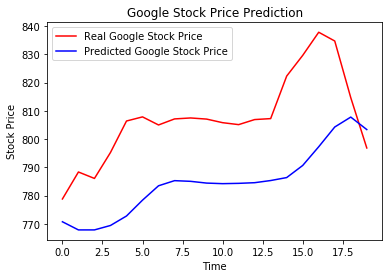

In [131]:
plt.plot(real_Stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [132]:
#END